Valores de WCSS (Inercia) para cada k:
   Número de Clústeres (k)         WCSS
0                        1  2500.000000
1                        2  1594.377251
2                        3   973.610081
3                        4   521.497438
4                        5   487.938268
5                        6   457.116015
6                        7   427.110052
7                        8   396.608685
8                        9   381.549088
9                       10   364.758217


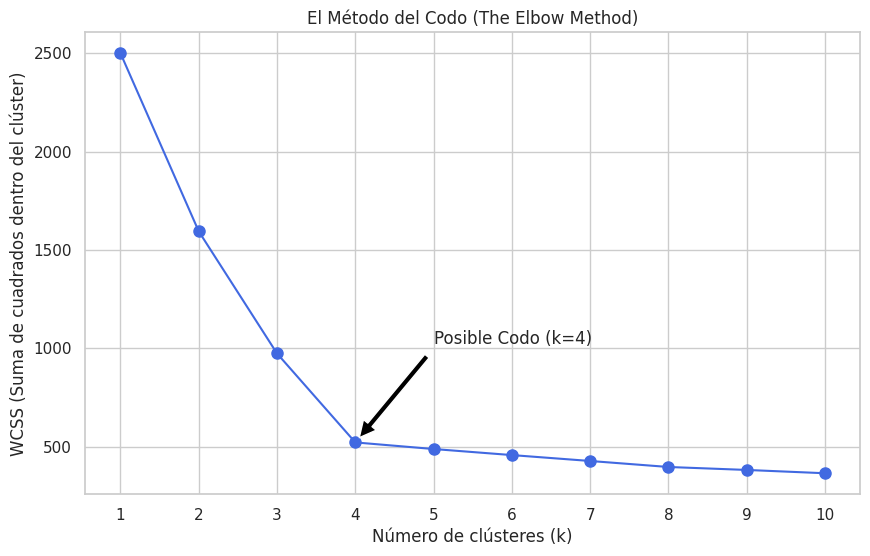

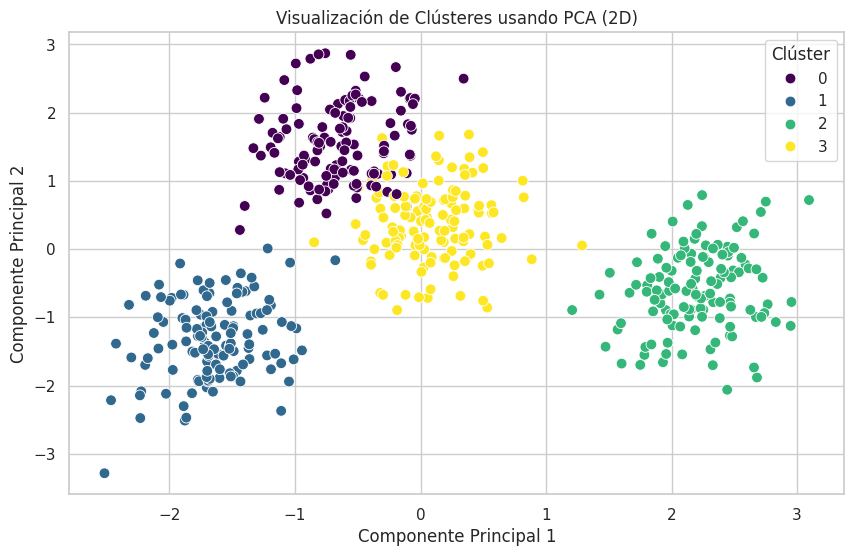

In [1]:
#  Jesus Ernesto Estrada Valenzuela IA 2025
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs # Corrección: 'conjunto de datos' -> 'datasets'
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Configuración de estilo visual con Seaborn
sns.set(style="whitegrid")

# 2. Generación y Preprocesamiento de Datos
# Generamos datos con 4 centros reales para probar el algoritmo
# Usamos make_blobs como se indica en tu lista de imports
datos, etiquetas_reales = make_blobs(n_samples=500, centers=4, n_features=5, cluster_std=1.8, random_state=42)

# Escalamos los datos (Buena práctica recomendada al usar K-Means)
scaler = StandardScaler()
datos_escalados = scaler.fit_transform(datos)

# 3. Cálculo del Método del Codo (WCSS)
wcss = []
rango_k = range(1, 11)

for i in rango_k:
    # init='k-means++' es el estándar mencionado en tu texto para optimizar el inicio [cite: 37]
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(datos_escalados)
    wcss.append(kmeans.inertia_)

# 4. Imprimir los valores numéricos
print("Valores de WCSS (Inercia) para cada k:")
df_wcss = pd.DataFrame({'Número de Clústeres (k)': list(rango_k), 'WCSS': wcss})
print(df_wcss)

# 5. Gráfica del Método del Codo (Tu petición principal)
plt.figure(figsize=(10, 6))
plt.plot(rango_k, wcss, marker='o', linestyle='-', color='royalblue', markersize=8)
plt.title('El Método del Codo (The Elbow Method)')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('WCSS (Suma de cuadrados dentro del clúster)')
plt.xticks(rango_k)

# Anotación visual del codo (suponiendo k=4 porque generamos 4 centros)
plt.annotate('Posible Codo (k=4)', xy=(4, wcss[3]), xytext=(5, wcss[3] + 500),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

# 6. USO EXTRA: Visualización con PCA (Ya que pediste importar PCA)
# K-means funciona en n-dimensiones, pero PCA nos ayuda a verlo en 2D
kmeans_final = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)
clusters_predichos = kmeans_final.fit_predict(datos_escalados)

pca = PCA(n_components=2)
datos_pca = pca.fit_transform(datos_escalados)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=datos_pca[:, 0], y=datos_pca[:, 1], hue=clusters_predichos, palette='viridis', s=60)
plt.title('Visualización de Clústeres usando PCA (2D)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Clúster')
plt.show()